In [1]:
import os

!pip install wget
if not os.path.exists('thinkdsp.py'):
    !python -m wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
    
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate


Saved under thinkdsp.py


# Упражнение 9.1
В этом упражнениии зучается влияние diff и differentiate на сигнал. Создайте треугольный сигнал и напечатайте его. Примените diff к сигналу и напечатайте результат. Вычислите спектр треугольного сигнала, примените differentiate и напечатайте результат. Преобразуйте спектр обратно в сигнал и напечатайте его. Есть ли различия в воздействии diff и differentiate на этот сигнал?

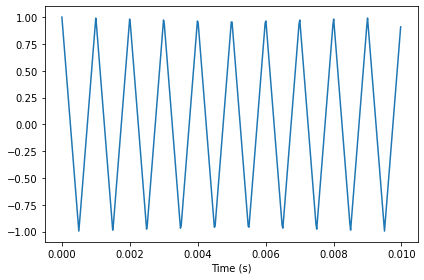

In [2]:
from thinkdsp import TriangleSignal

wave = TriangleSignal(freq=1000).make_wave(duration=0.01, framerate=44100)
wave.plot()
decorate(xlabel='Time (s)')

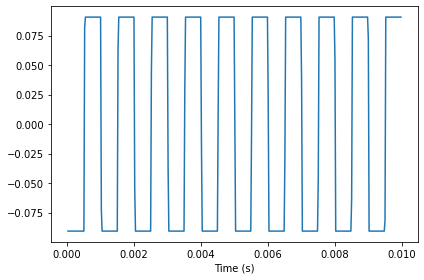

In [3]:
diff_wave = wave.diff()
diff_wave.plot()
decorate(xlabel='Time (s)')

Получили прямоугольный сигнал с такой же частотой.

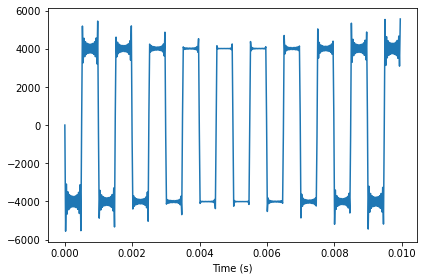

In [4]:
differentiate_wave = wave.make_spectrum().differentiate().make_wave()
differentiate_wave.plot()
decorate(xlabel='Time (s)')

График похож, но он зашумлен и находится не в промежутке [-1;1]

# Упражнение 9.2
В данном упражнении изучается влияние cumsum и integrate на сигнал. Создайте прямоугольный сигнал и напечатайте его. Примените cumsum и напечатайте результат. Вычислите спектр прямоугольного сигнала, примените integrate и напечатайте результат. Преобразуйте спектр обратно в сигнал и напечатайте его. Есть ли различия в воздействии cumsum и integrate на этот сигнал?

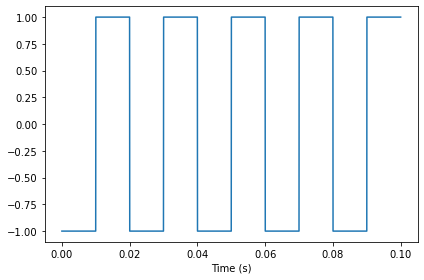

In [5]:
from thinkdsp import SquareSignal

wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time (s)')

Кумулятивная сумма:

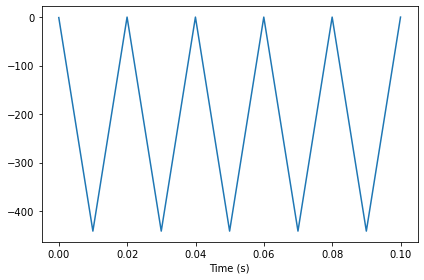

In [6]:
cumsum_wave = wave.cumsum()
cumsum_wave.plot()
decorate(xlabel='Time (s)')

Получили треугольный сигнал.

Интеграл спектра:

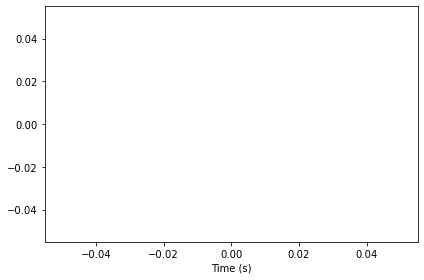

In [7]:
int_wave = wave.make_spectrum().integrate().make_wave()
int_wave.plot()
decorate(xlabel='Time (s)')


У нас получилось деление на ноль при f=0, результат в NumPy стал NaN. Решим это по другому

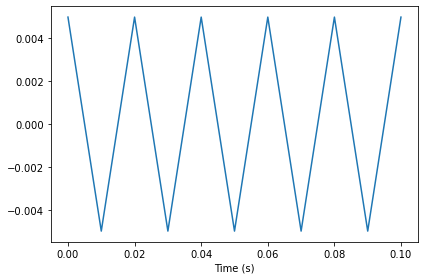

In [8]:
int_spec = wave.make_spectrum().integrate()
int_spec.hs[0] = 0
int_wave = int_spec.make_wave()
int_wave.plot()
decorate(xlabel='Time (s)')

Воспользуемся трюком из главы и соединим два графика.

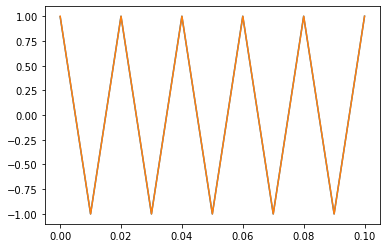

In [9]:
cumsum_wave.unbias()
cumsum_wave.normalize()
int_wave.normalize()
cumsum_wave.plot()
int_wave.plot()

Видим, что графики практически идентичны. Следовательно разные у них лишь амплитуды.

# Упражнение 9.3
В данном упражнении изучается влияние двойного интегрирования. Создайте пилообразный сигнал, вычислите его спектр, а затем дважды примените integrate. Напечатайте результирующий сигнали его спектр. Какова математическая форма сигнала? Почему он напоминает синусоиду?

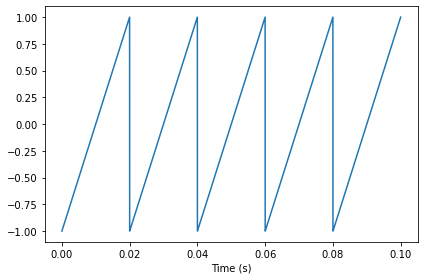

In [10]:
from thinkdsp import SawtoothSignal

wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time (s)')

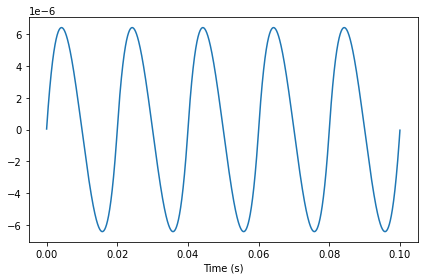

In [11]:
spectrum = wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0

wave1 = spectrum.make_wave()
wave1.plot()
decorate(xlabel='Time (s)')

Сигнал действительно напоминает синусойду. Причиной стала фильтрация низких чистот, за исключением основной.

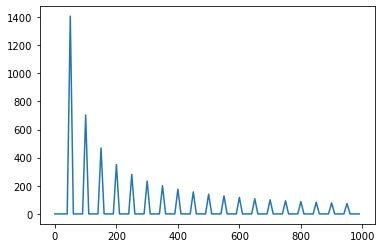

In [12]:
wave.make_spectrum().plot(high=1000)

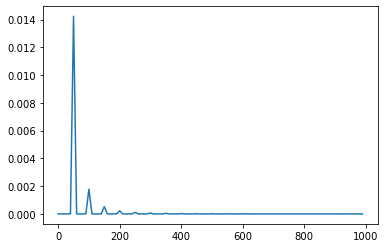

In [13]:
wave1.make_spectrum().plot(high=1000)

# Упражнение 9.4
В этом упражнении изучается влияние второй разности и второй производной. Создайте CubicSignal, определенный в thinkdsp.
Вычислите вторую разность, дважды применив diff. Как выглядит результат? Вычислите вторую производную, дважды применивdifferentiate к спектру. Похожи ли результаты?

Распечатайте фильтры, соответствующие второй разнице и второй производной, и сравните их. Подсказка: для того чтобы получить фильтры в одном масштабе, используйте сигнал с частотой кадров 1.

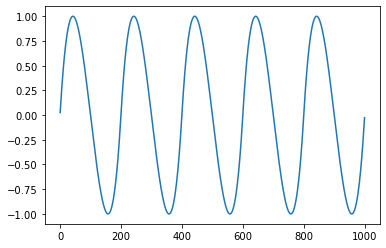

In [14]:
from thinkdsp import CubicSignal

wave = CubicSignal(freq=0.005).make_wave(duration=1000, framerate=1)
wave.plot()

Первая разность - пароболы.

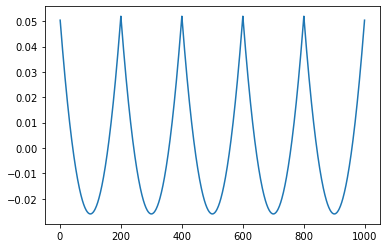

In [15]:
d1_wave = wave.diff()
d1_wave.plot()

Вторая разность - пилообразный сигнал.

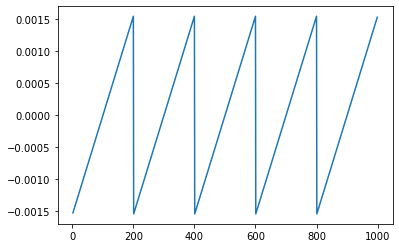

In [16]:
d2_wave = d1_wave.diff()
d2_wave.plot()

При двойном дифференцировании получаем звон в пилообразном сигнале, звон связан со сложностями в вычислении производной, как и ранее.

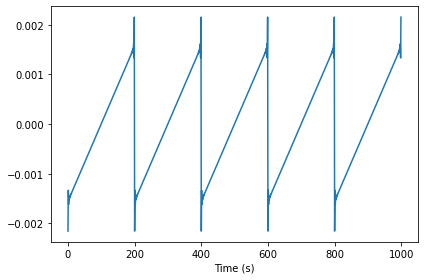

In [17]:
spectrum = wave.make_spectrum().differentiate().differentiate()
di_wave = spectrum.make_wave()
di_wave.plot()
decorate(xlabel='Time (s)')

Фильтры:

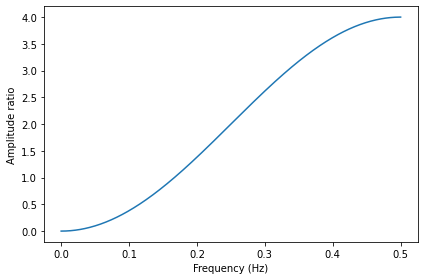

In [18]:
from thinkdsp import zero_pad
from thinkdsp import Wave

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(wave))
diff_wave = Wave(padded, framerate=wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot()

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

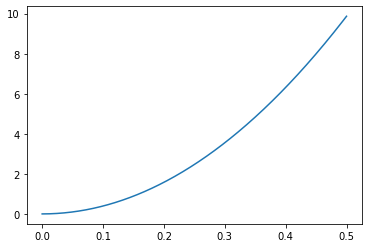

In [19]:
deriv_filter = wave.make_spectrum()
deriv_filter.hs = (2 * np.pi * 1j * deriv_filter.fs)**2
deriv_filter.plot()

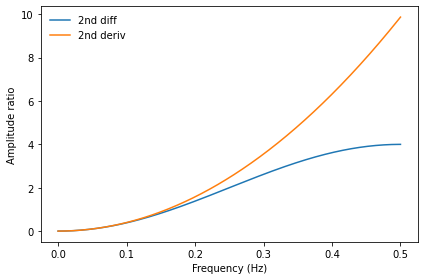

In [20]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Мы получили для ФВЧ, для усиления высокочастотных компонент. Производная является пароболой, поэтому она усиливает сильней. А Разность хорошо аппроксимирует только на низких частотах, а далее получаем существенное отклонение.